# Generate a pore
This section describes how to create a pore.

In [1]:
import os
import pymol
import xmlrpc.client as xmlrpclib

In [2]:
os.system("pymol -R &")
cmd = xmlrpclib.ServerProxy('http://localhost:9123')

In [3]:
from pymol import cmd
from IPython.display import Image
from PIL             import Image
from porems.store    import Store

In [4]:
def img_pymol(mol, pic, is_finish=True):
    # Save gro file
    if is_finish: mol.finalize()
    Store(mol,"_build").gro("temp.gro")
    
    # Load into pymol
    cmd.delete("all")
    cmd.load("_build/temp.gro")
    
    # Edit view
    cmd.set_color("deepBlue", [0.00, 0.45, 0.70])
    # cmd.color("deepBlue")
    # cmd.set("specular","off")
    # cmd.set("surface_quality",4)
    # cmd.set("sphere_quality",2)
    # cmd.set("ray_shadows","off")
    # cmd.set("ray_trace_mode",5)
    cmd.set("ray_opaque_background",0)

    # Generate image
    pic_link = "/tmp/"+pic+".png"
    # cmd.png(pic_link, width=400, height=400, dpi=1000, ray=0)
    cmd.png(pic_link)
    
    # Load image
    img = Image.open(pic_link)

    # Display image
    display(img)

## Initialize object
An empty pore will be generated by simply initializing a new object with the desired properties.

In [8]:
from porems.pore import Pore

pore = Pore(size=[7, 7, 7], diam=5, drill="z", res=5.5)

## Add specifically placed molecules
Using the following function a specific placement can be done within the pore.

In [9]:
from porems.essentials import Alkane

pore.special(Alkane(15), [0, 1], [0, 2], 2, "point")

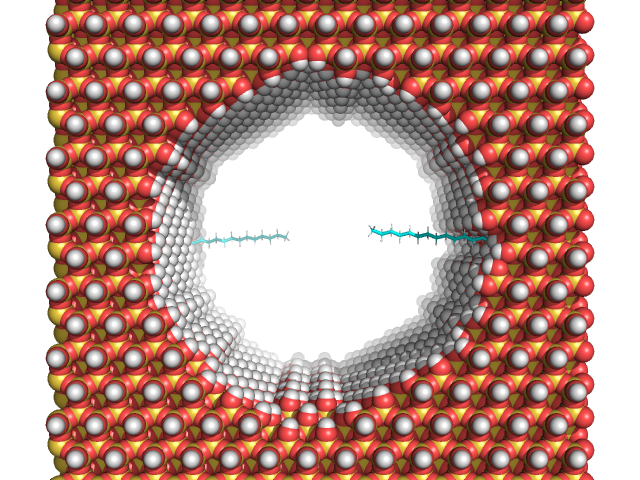

In [11]:
img_pymol(pore, "01")

## Functionalize surface
The entire surface can be filled on the inside and outside using the following command.

In [13]:
from porems.pore import Pore
from porems.essentials import Alkane

pore = Pore(size=[7, 7, 7], diam=5, drill="z", res=5.5)
pore.special(Alkane(15), [0, 1], [0, 2], 2, "point")

In [ ]:
from porems.essentials import TMS

# Inside
pore.attach(TMS(), [0, 1], [1, 2], 0, 4.3, inp="molar")

# Outside
pore.attach(TMS(), [0, 1], [1, 2], 1, 60, inp="percent")

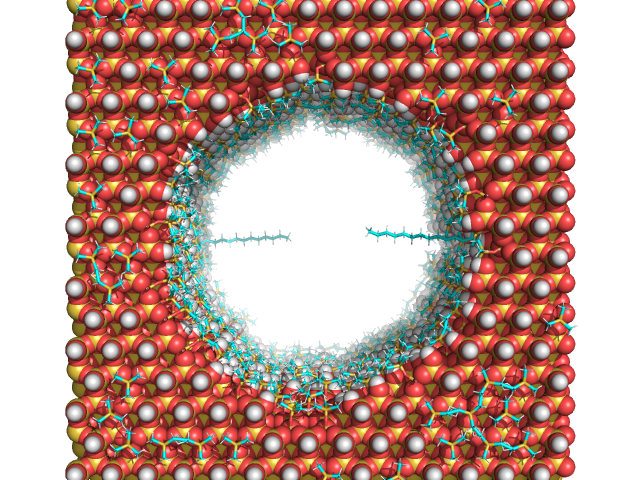

In [15]:
img_pymol(pore, "02")

## Finalize
In order to finalize the pore simply run following command

In [ ]:
from porems.pore import Pore
from porems.essentials import Alkane
from porems.essentials import TMS

pore = Pore(size=[7, 7, 7], diam=5, drill="z", res=5.5)
pore.special(Alkane(15), [0, 1], [0, 2], 2, "point")
pore.attach(TMS(), [0, 1], [1, 2], 0, 4.3, inp="molar")
pore.attach(TMS(), [0, 1], [1, 2], 1, 60, inp="percent")

In [7]:
pore.finalize()

Pore is finalized. Attachement functions should not be called anymore.


## Properties
Pore properties can be called using following command which returns a dictionary with all information. In future releases it is planned to beautify the output.

In [12]:
props = pore.get_props()

for prop in props:
    print(prop, props[prop])

Roughness 0.13074355811645236
Diameter 5.018087840616019
Surface {0: 119.73356406364567, 1: 62.668834776734734}
Volume 150.20838548534985
Dimension [7.21, 7.089, 7.595]
Allocation {'Molecule_0': 2, 'tms_0': 245, 'tms_1': 84, 'Molecule_0_mod': [0.01670375400281978, 0.02773788442846194], 'Molecule_0_rel': [0.003355704697986577, 0.0055724089969886705], 'tms_0_mod': [2.046209865345423, 3.3978908424865875], 'tms_0_rel': [0.4110738255033557, 0.6826201021311121], 'tms_1_mod': [1.3403791581455138, 2.225803982307396], 'tms_1_rel': [0.31343283582089554, 0.5204796343754493], 'OH': {'in': [2.914805073492052, 4.840260832766609], 'out': [2.9360686321282685, 4.875570627911439]}, 'SLX': [0.0, 0.0]}
Charge 2.8000055954713332e-05
System_Size [7.21, 7.089, 7.595]
Generation_Time {'Build': 0.16160321235656738, 'Matrix': 3.183939218521118, 'Prepare': 0.06267118453979492, 'Binding': 0.23377585411071777, 'Props': 0.0035190582275390625, 'Attach_Molecule_0': 0.001528024673461914, 'Attach_tms_0': 0.095197200775